In [595]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import r2_score as r2
from sklearn.decomposition import PCA
import seaborn as sns

In [596]:
data = pd.read_csv('C:/Users/Mell/Kurs_project_task/train.csv')

In [597]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [598]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [599]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [305]:
data.shape

(10000, 20)

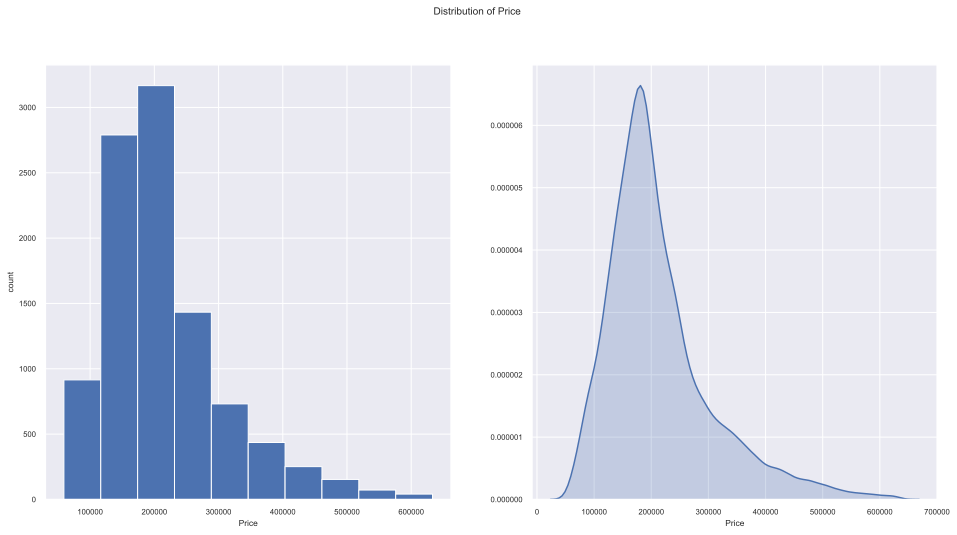

In [639]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
data['Price'].hist()
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(data['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

### Очистка данных, feature engineering, EDA

Посмотрим степень корреляции признака Healthcare_1

In [600]:
data.corr()['Healthcare_1'].sort_values()

HouseFloor      -0.143973
Floor           -0.138294
Ecology_1       -0.043547
Square          -0.039748
LifeSquare      -0.026867
HouseYear       -0.011969
Id              -0.003879
KitchenSquare    0.009472
Rooms            0.042857
Social_2         0.050458
Shops_1          0.057758
Social_1         0.077133
Social_3         0.133877
Price            0.138755
Helthcare_2      0.203177
DistrictId       0.304335
Healthcare_1     1.000000
Name: Healthcare_1, dtype: float64

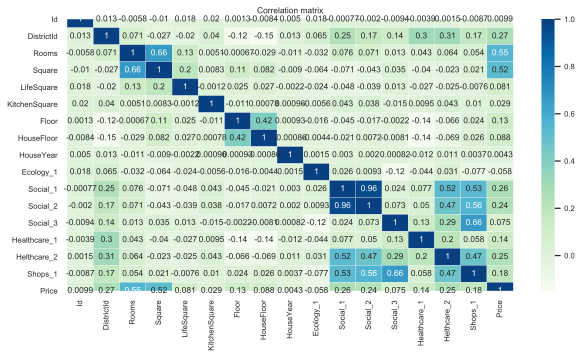

In [601]:
plt.figure(figsize = (10,5))
sns.set(font_scale=0.7)
sns.heatmap(data.corr(), annot=True, linewidths=.2, cmap='GnBu')
plt.title('Correlation matrix')
plt.show()

Очевидно, что степень корреляции признака Healthcare_1 с другими признаками незначительная. Учитывая большое число пропущенных 
данных, оптимальным решением будет удаление признака. 

In [602]:
data.drop(['Healthcare_1'], axis = 1, inplace=True)

#### Rooms

In [603]:
data.loc[data['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [604]:
data.loc[data['Rooms'].isin([1,2,3,4,5]), ['Rooms', 'Price','Square']].groupby('Rooms').median()

,Price,Square
Rooms,,
1.0,154979.497993,40.406590
2.0,200320.754636,55.841812
3.0,268723.157677,77.413643
4.0,377524.231990,98.668054
5.0,455355.638212,116.084861


Заменим аномально большие значения Rooms исходя из средних значений площади. 

In [605]:
data.loc[data['Id'].isin([5927, 14003, 14865]), 'Rooms'] = 2
data.loc[data['Id'] == 8491, 'Rooms'] = 1

In [606]:
data.loc[data['Rooms'] <= 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


Заменим значения исходя из средних значений площади. 

In [607]:
data.loc[data['Id'].isin([3224, 3159, 7317]), 'Rooms'] = 1
data.loc[data['Id'].isin([770]), 'Rooms'] = 2
data.loc[data['Id'].isin([456, 9443]), 'Rooms'] = 3
data.loc[data['Id'].isin([12638]), 'Rooms'] = 4
data.loc[data['Id'].isin([7917]), 'Rooms'] = 5

#### Square

In [608]:
data.loc[data['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1981,7917,27,5.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562
9910,16568,27,4.0,200.334539,201.627361,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016


Сопоставляя значения Square и LifeSquare, а также количество Rooms, считаем что аномальные значения под ID 28, 2307, 11602.
Все 3 значения можно объяснить случайным превышением площади в 10 раз. 

In [609]:
data.loc[data['Id'].isin([28, 2307, 11602]), 'Square'] = data.loc[data['Id'].isin([28, 2307, 11602]), 'Square']/10

In [610]:
data.loc[data['Id'].isin([28, 2307, 11602])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4262,28,9,2.0,60.470597,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4690,2307,102,1.0,40.942518,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,64.106519,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562


In [611]:
data.loc[data['Square'] < 15].sort_values(['Square'])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8283,15744,34,1.0,1.988943,2.642219,1.0,21,4.0,1977,0.069753,B,B,53,13670,4,1,11,B,458378.777006
4853,3224,27,1.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
9294,6782,45,1.0,2.954309,5.257278,1.0,3,1.0,1977,0.195781,B,B,23,5212,6,3,2,B,438005.182323
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
9613,7657,38,1.0,4.502784,4.618547,1.0,28,1.0,1977,0.060753,B,B,15,2787,2,0,7,B,483283.488083
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261


Исправим значение под ID 10527, остальные удалим.  

In [612]:
data.loc[data['Id'].isin([10527]), 'Square'] = data.loc[data['Id'].isin([10527]), 'Square']*10

In [613]:
data.drop(data.loc[data['Square'] < 15, :].index, inplace = True)

#### LifeSquare

In [614]:
data['LifeSquare/Square'] = data['LifeSquare']/data['Square']

In [615]:
data['LifeSquare/Square_avg'] = data.groupby('Rooms')['LifeSquare/Square'].transform('mean')

In [616]:
data.loc[data['LifeSquare']>data['Square'],'LifeSquare'] = data['Square']*data['LifeSquare/Square_avg']

In [617]:
data.loc[(data['LifeSquare']<15) & (data['Square']>20),'LifeSquare'] =  data['Square']*data['LifeSquare/Square_avg']

In [618]:
data['LifeSquare'].fillna(data['Square']*data['LifeSquare/Square_avg'], inplace=True)

In [324]:
data.drop(['LifeSquare/Square', 'LifeSquare/Square_avg'], axis = 1, inplace=True)

#### KitchenSquare

In [619]:
data.loc[data['KitchenSquare'] > data['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare/Square,LifeSquare/Square_avg
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,0,0,A,108337.484207,0.986141,0.621772
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,1,0,B,160488.033165,0.518063,0.621772
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,0,0,B,99079.960518,0.489710,0.621772
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,6,6,B,105539.556275,0.597286,0.621772


In [620]:
data.loc[data['Id'].isin([13703, 6569]), 'KitchenSquare'] = data.loc[data['Id'].isin([13703, 6569]), 'KitchenSquare']/10

In [621]:
data.loc[data['Id'].isin([14656, 14679]), 'KitchenSquare'] = data.loc[data['Rooms'] == 1, 'KitchenSquare'].median() 

In [622]:
data.loc[data['KitchenSquare'].isin([0,1])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare/Square,LifeSquare/Square_avg
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,1,3,B,220925.908524,0.649587,0.658460
7,11993,74,2.0,80.312926,52.882845,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,0,2,B,221244.156664,NaN,0.658460
8,5172,1,2.0,64.511437,42.478198,1.0,9,17.0,1977,0.007122,B,B,1,264,0,0,1,B,229102.795999,NaN,0.658460
12,6452,13,2.0,54.522805,31.759753,1.0,8,12.0,1999,0.090799,B,B,74,19083,2,5,15,B,229220.372609,0.582504,0.658460
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,0,0,A,140647.565937,0.974687,0.621772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,16159,27,1.0,38.968338,24.229437,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,0,1,B,95529.569405,NaN,0.621772
9986,2996,1,2.0,64.994245,42.796108,1.0,9,22.0,1977,0.007122,B,B,1,264,0,0,1,B,200332.511658,NaN,0.658460
9987,15623,23,2.0,55.620092,36.623603,0.0,2,4.0,1977,0.034656,B,B,0,168,0,0,0,B,115797.553006,NaN,0.658460
9994,4158,23,2.0,64.864198,42.710477,1.0,17,17.0,1977,0.075779,B,B,6,1437,3,0,2,B,171323.515653,NaN,0.658460


In [623]:
data.loc[data['KitchenSquare'].isin([0,1]), 'KitchenSquare' ] = None 

In [624]:
data['KitchenSquare'].fillna(data.groupby('Rooms')['KitchenSquare'].transform('mean'), inplace = True)

#### Floor & HouseFloor

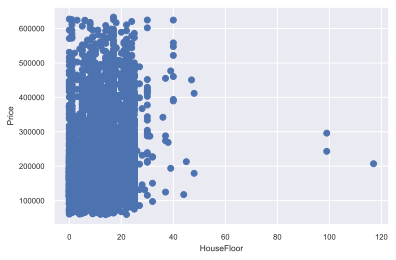

In [625]:
plt.scatter(data['HouseFloor'], data['Price'])
plt.xlabel("HouseFloor")
plt.ylabel("Price")
plt.show()

In [626]:
data.loc[data['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare/Square,LifeSquare/Square_avg
6131,10806,5,1.0,51.944587,48.709601,8.017565,6,99.0,1977,0.150818,B,B,16,3433,4,4,5,B,296127.115515,0.937722,0.621772
8599,9300,74,2.0,71.747869,47.243099,9.000000,5,99.0,1977,0.075779,B,B,6,1437,3,0,2,B,243329.912579,1.039471,0.658460
8854,78,30,2.0,65.773749,43.309379,7.842381,8,117.0,1977,0.000078,B,B,22,6398,141,3,23,B,207248.370520,1.015782,0.658460


In [627]:
#data.loc[data['HouseYear'] == 1977, ['HouseFloor','HouseYear']].groupby('HouseFloor').count()
#Заменим выбросы:
data.loc[data['HouseFloor'] == 99, 'HouseFloor'] = 9
data.loc[data['HouseFloor'] == 117, 'HouseFloor'] = 17

In [334]:
data.loc[data['HouseFloor'] < data['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,52.882845,7.842381,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
14,10953,27,1.0,53.769097,52.408027,8.017565,5,4.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.000000,6,5.0,1983,0.051815,B,B,5,1227,0,NaN,0,0,B,117000.381287
21,11935,27,2.0,64.711835,42.610152,7.842381,15,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,127200.026511
23,6641,54,3.0,118.907612,86.841039,8.922565,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3.0,64.074977,47.633428,6.000000,11,9.0,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
9985,16159,27,1.0,38.968338,24.229437,8.017565,10,1.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,95529.569405
9989,4145,96,3.0,90.055233,47.860231,11.000000,26,24.0,2005,0.041116,B,B,53,14892,4,NaN,1,4,B,441108.911237
9991,11553,3,3.0,101.622794,51.628780,12.000000,18,17.0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504


Этажность дома не может быть меньше этажа на котором расположена квартира,поменяем их местами.

In [335]:
floor_index = data[data['HouseFloor'] < data['Floor']].index
data.loc[floor_index, 'Floor'], data.loc[floor_index, 'HouseFloor'] = data.loc[floor_index, 'HouseFloor'], data.loc[floor_index, 'Floor']

#### HouseYear

In [629]:
data.loc[data['HouseYear'] > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare/Square,LifeSquare/Square_avg
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396,0.543128,0.621772
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096,0.633160,0.658460


Данные записи явно являются опечатками, исправим их

In [630]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2005
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968

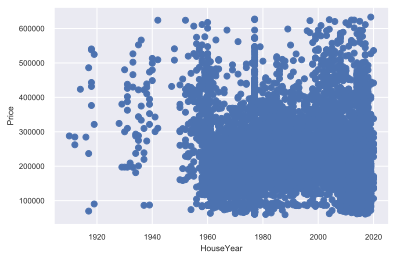

In [631]:
plt.scatter(data['HouseYear'], data['Price'])
plt.xlabel("HouseYear")
plt.ylabel("Price")
plt.show()

По нижней границе выбросов не наблюдается

In [339]:
data.shape

(9988, 20)

#### Применим One-Hot разложение категориальных признаков 

In [632]:
transform_data = pd.get_dummies(data)

#### Преобразуем целочисленные значения к int

In [633]:
def int_prep(df, cat_feats=['Rooms', 'KitchenSquare', 'Floor', 'HouseFloor']):
    df_copy = df.copy()
    for col in cat_feats:
        df_copy.loc[:, col] = df[col].astype(int)
    return df_copy

In [634]:
transform_data = int_prep(transform_data)

#### Подготовка сетов данных

In [635]:
features = transform_data.drop('Price', axis = 'columns').columns.tolist()
target = ['Price']

In [636]:
X_train, X_valid,y_train, y_valid = train_test_split(transform_data[features], transform_data[target], test_size = 0.3, random_state = 21)

#### Подготовка модели и предсказание на валидационных данных

In [51]:
model = RF(max_depth=6, n_estimators=300, random_state=21)
model.fit(X_train,np.ravel(y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=21, verbose=0,
                      warm_start=False)

In [52]:
predict_price = model.predict(X_valid)

In [53]:
r2(y_valid.values.flatten(), predict_price)

0.6567556253878135

In [5]:
#plt.scatter(max_depth_, arr_r2_test, c = 'r')

In [356]:
model = RF(max_depth=50, n_estimators=400, min_samples_leaf = 1, min_samples_split =5, max_features = 5, random_state=21)
model.fit(X_train,np.ravel(y_train))
predict_price = model.predict(X_valid)
r2(y_valid.values.flatten(), predict_price)

0.7351976139955662

### Загрузка и обработка тестовых данных

In [541]:
test = pd.read_csv('C:/Users/Mell/Kurs_project_task/test.csv')

In [542]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [543]:
test = test.drop(['Healthcare_1'], axis = 1)

In [544]:
test.loc[test['Rooms'] > 5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B


In [545]:
test.loc[test['Id'].isin([10793, 4058]), 'Rooms'] = 5
test.loc[test['Id'] == 1435, 'Rooms'] = 2

In [546]:
test.loc[test['Rooms'] < 1]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,0,0,B


In [547]:
test.loc[test['Id']== 10729, 'Rooms'] = 3
test.loc[test['Id'] == 3343, 'Rooms'] = 5

In [548]:
test.loc[test['Square'] > 200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
3217,4058,27,5.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,1,4,B
3909,1397,76,3.0,221.138768,118.055342,4.0,32,48.0,2011,0.000000,B,B,7,1660,39,1,5,B


In [549]:
test.loc[test['Square'] < 13].sort_values(['Square'])

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,1,3,B
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,3,2,B
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,0,0,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,3,23,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,0,0,B
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,0,0,B
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,0,0,B
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,0,0,B


In [550]:
square_ind = test.loc[test['Square'] < 13, :].index
test.loc[square_ind, 'Square'] = test.loc[square_ind, 'Square']*10

In [551]:
test['LifeSquare/Square'] = None

In [552]:
test.loc[test['Rooms'] == 1.0, 'LifeSquare/Square'] = 0.609137
test.loc[test['Rooms'] == 2.0, 'LifeSquare/Square'] = 0.651515
test.loc[test['Rooms'] == 3.0, 'LifeSquare/Square'] = 0.684838
test.loc[test['Rooms'] == 4.0, 'LifeSquare/Square'] = 0.677370
test.loc[test['Rooms'] == 5.0, 'LifeSquare/Square'] = 0.734743

Значения коэффициентов были получены на train выборке.

In [ ]:
test.loc[test['LifeSquare']>test['Square'],'LifeSquare'] = test['Square']*test['LifeSquare/Square']

In [554]:
test['LifeSquare'].fillna(test['Square']*test['LifeSquare/Square'], inplace=True)

In [555]:
test.drop(['LifeSquare/Square'], axis = 1, inplace=True)

In [556]:
test.loc[test['KitchenSquare'] > test['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,2,5,B
2424,10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,B,B,31,6119,4,1,2,B
3863,3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,0,0,B
4555,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,0,0,B


In [557]:
test.loc[test['Id'].isin([14594, 10662, 3194, 12640]), 'KitchenSquare'] = test.loc[test['Id'].isin([14594, 10662, 3194, 12640]), 'KitchenSquare']/10

In [558]:
test.loc[test['Id'].isin([14594]), 'KitchenSquare'] = test.loc[test['Id'].isin([14594]), 'KitchenSquare']/10

In [559]:
test.loc[test['KitchenSquare'].isin([0,1])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1,15856,74,2.0,69.263183,45.126003,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,0,2,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,0,0,A
5,7633,53,1.0,40.675627,24.777029,1.0,21,21.0,1977,0.049637,B,B,34,7759,0,1,3,B
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,B,B,6,1437,3,0,2,B
11,3310,6,3.0,84.625350,57.954656,1.0,6,17.0,1977,0.243205,B,B,5,1564,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4982,12920,23,1.0,39.610426,38.187571,1.0,6,18.0,2013,0.034656,B,B,0,168,0,0,0,B
4985,11732,1,1.0,46.597283,28.384129,1.0,17,24.0,1977,0.007122,B,B,1,264,0,0,1,B
4987,5361,53,3.0,80.102103,54.856964,1.0,13,22.0,1977,0.049637,B,B,34,7759,0,1,3,B
4998,4780,62,2.0,81.305222,52.971572,0.0,4,0.0,1977,0.072158,B,B,2,629,1,0,0,A


In [560]:
test.loc[(test['KitchenSquare'].isin([0,1])) & (test['Rooms'] == 1), 'KitchenSquare' ] = 8.017565
test.loc[(test['KitchenSquare'].isin([0,1])) & (test['Rooms'] == 2), 'KitchenSquare' ] = 7.842381
test.loc[(test['KitchenSquare'].isin([0,1])) & (test['Rooms'] == 3), 'KitchenSquare' ] = 8.922565
test.loc[(test['KitchenSquare'].isin([0,1])) & (test['Rooms'] == 4), 'KitchenSquare' ] = 9.684615
test.loc[(test['KitchenSquare'].isin([0,1])) & (test['Rooms'] == 5), 'KitchenSquare' ] = 11.714286

Значения площади были получены на train выборке.

In [564]:
test.loc[test['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
651,15864,27,3.0,47.722835,47.098813,9.0,18,99.0,1977,0.072158,B,B,2,629,1,0,0,A


In [565]:
test.loc[test['HouseFloor'] == 99, 'HouseFloor'] = 19

In [566]:
test[test['HouseFloor'] < test['Floor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1,15856,74,2.0,69.263183,45.126003,7.842381,6,1.0,1977,0.075779,B,B,6,1437,3,0,2,B
10,15975,61,3.0,64.543658,42.651541,7.000000,10,9.0,1981,0.300323,B,B,52,10311,6,1,9,B
14,5214,27,1.0,37.555197,22.876260,8.017565,5,1.0,1977,0.211401,B,B,9,1892,0,0,1,B
22,12694,27,3.0,83.670032,46.358356,8.922565,8,0.0,2015,0.072158,B,B,2,629,1,0,0,A
24,8968,27,2.0,69.849239,45.507827,7.842381,3,0.0,1977,0.011654,B,B,4,915,0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,4723,95,1.0,45.542940,27.741890,8.017565,6,0.0,1977,0.000699,B,B,14,3369,24,0,3,B
4989,2591,39,2.0,44.203592,30.191691,6.000000,10,9.0,1972,0.428826,B,B,25,5011,8,0,2,B
4993,14562,113,2.0,46.627882,27.058739,5.000000,6,5.0,1969,0.307467,B,A,30,5048,9,2,5,B
4997,5783,12,3.0,77.842178,48.282625,9.000000,23,22.0,1989,0.090799,B,B,74,19083,2,5,15,B


In [567]:
floors_index = test[test['HouseFloor'] < test['Floor']].index
test.loc[floors_index, 'Floor'], test.loc[floors_index, 'HouseFloor'] = test.loc[floors_index, 'HouseFloor'], test.loc[floors_index, 'Floor']

In [568]:
test.loc[test['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


In [569]:
test.loc[test['HouseYear'] < 1900, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2


In [570]:
test = pd.get_dummies(test)

In [572]:
test = int_prep(test)

In [578]:
test['Price'] = model.predict(test.loc[:,features])

In [580]:
test.loc[:, ['Id', 'Price']].to_csv('AMelnik_predictions.csv', index=None)

In [581]:
result = pd.read_csv('AMelnik_predictions.csv')

In [583]:
result.shape

(5000, 2)